In [3]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from __future__ import division
from fatiando import mesher, gridder, utils
from fatiando.gravmag import polyprism
from fatiando.mesher import PolygonalPrism
from fatiando.gravmag import prism
from fatiando.mesher import Prism
from fatiando.vis import mpl, myv
from fatiando.constants import CM, T2NT
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
import mag_polyprism_functions as mfun
import numpy.testing as npt
import polyprism_tests as tests
% matplotlib inline

In [4]:
A = 10.
B = 10.
C = -1.
D = 5.

In [8]:
npt.assert_almost_equal(A,B, decimal=8)

In [2]:
x = np.linspace(1., 15., 20)

In [4]:
phi = A + B*(1./(1 + np.exp(C*(x - D))))

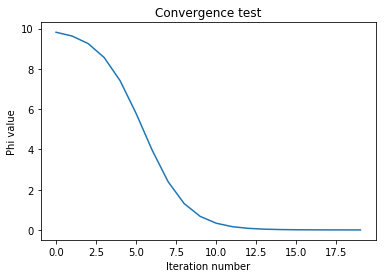

In [5]:
plt.title('Convergence test')
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi)

In [6]:
phi[9] = 2.
phi[10] = 3.

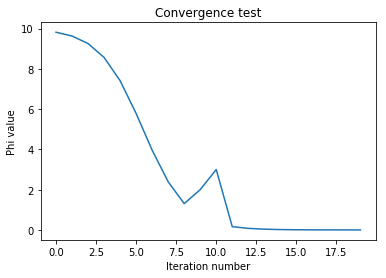

In [7]:
plt.title('Convergence test')
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi)

In [8]:
phi0 = 10.
itmax = 18
itmax_marq = 12
lamb = 0.001
dlamb = 5.
epsilon = 0.0001
phi_list = []
k = -1
for it in range(itmax):
    # gradient and hessian computation
    for it_marq in range(itmax_marq):
        k += 1 # solve the linear system and compute a new phi
        dphi = phi[k] - phi0
        print '%3d %12.5e %3d %3d %12.5e' % (it, phi[k], k, it_marq, lamb)
        if (dphi > 0.):
            lamb *= dlamb
        else:
            lamb /= dlamb
            break
    relative_variation = abs(dphi/phi0)
    if (relative_variation > epsilon):
        phi0 = phi[k]
        phi_list.append(phi0)
    else:
        print 'convergence achieved'
        break

  0  9.82014e+00   0   0  1.00000e-03
  1  9.63143e+00   1   0  2.00000e-04
  2  9.25966e+00   2   0  4.00000e-05
  3  8.56863e+00   3   0  8.00000e-06
  4  7.41280e+00   4   0  1.60000e-06
  5  5.78298e+00   5   0  3.20000e-07
  6  3.96265e+00   6   0  6.40000e-08
  7  2.39050e+00   7   0  1.28000e-08
  8  1.30705e+00   8   0  2.56000e-09
  9  2.00000e+00   9   0  5.12000e-10
  9  3.00000e+00  10   1  2.56000e-09
  9  1.62183e-01  11   2  1.28000e-08
 10  7.82865e-02  12   0  2.56000e-09
 11  3.76233e-02  13   0  5.12000e-10
 12  1.80428e-02  14   0  1.02400e-10
 13  8.64382e-03  15   0  2.04800e-11
 14  4.13899e-03  16   0  4.09600e-12
 15  1.98145e-03  17   0  8.19200e-13
 16  9.48463e-04  18   0  1.63840e-13
 17  4.53979e-04  19   0  3.27680e-14


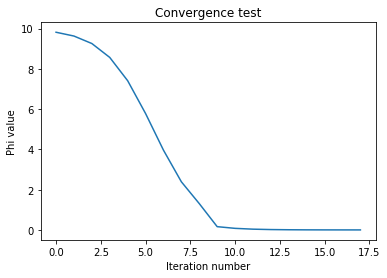

In [9]:
plt.title('Convergence test')
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list)